### Training the MDP model



In [1]:
# the required imports
import numpy as np
import pandas as pd
# from linear_aproximation import Model
# from environment import network
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# additional import for the Neural Network
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras import optimizers
import tensorflow as tf


Using TensorFlow backend.


In [2]:
# path = '/Users/mawongh/OneDrive/REFERENCE FILE/D/Disertation/brainstorming/'
path = '/home/mawongh/ws/datasets/'
dataset = pd.read_pickle(path + 'full_dataset.pickle')
dataset.tail(3)

,action,reward,s_next,state
299475,121.0,-2.915486,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."
299476,121.0,-3.054551,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."
299477,121.0,-2.653020,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."


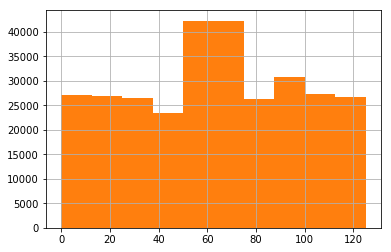

In [7]:
dataset.action.hist()
plt.show()

In [25]:
# decorrelating samples
N = len(dataset)
sample_indexes = np.random.choice(np.arange(N), size = N, replace=False)
dataset_decorr = dataset.iloc[sample_indexes]

S_woScale = dataset_decorr.state.tolist()
a = dataset_decorr['action'].values
r = dataset_decorr['reward'].values




scaler = StandardScaler()
S = scaler.fit_transform(S_woScale)


In [27]:
# model 6
model6 = Sequential()
n_cols = 105

model6.add(Dense(400, activation = 'relu', input_shape=(n_cols,)))
model6.add(Dense(400, activation = 'relu'))
model6.add(Dense(400, activation = 'relu'))
model6.add(Dense(126, activation = 'linear'))
model6.compile(optimizer=optimizers.Adam(), loss='mean_squared_error')

In [28]:

def train_model6(num_epochs = 20):
    for epoch in np.arange(num_epochs):
        print('model: 6, epoch: {}'.format(epoch))
        for step in np.arange(len(S)):
            s = S[step].reshape(1,-1)
            r_temp = model6.predict_on_batch(s)
            r_temp[0,int(a[step])] = r[step]
            model6.train_on_batch(s,r_temp)

In [ ]:
# train the model with all the samples (300K)
train_model6(num_epochs = 20)
print('trained!')


model: 6, epoch: 0
model: 6, epoch: 3


In [69]:
modelfilename = 'MDP_model6.h5'
weightsfilename = 'MDP_model6_weigths.h5'
model6.save(path + modelfilename)
model6.save_weights(path + weightsfilename)



In [79]:
# let's try the model
# let's choose a random sample of 
N = len(S)
sample_indexes = np.random.choice(np.arange(N), size = 50000, replace=False)
S_sample = S[sample_indexes]
a_sample = a[sample_indexes]
r_sample = r[sample_indexes]

y_predict = model6.predict(S_sample)


In [80]:
r_predict = [y_predict[i, int(a_sample[i])] for i in np.arange(len(y_predict))]
MSE = mean_squared_error(r_predict, r_sample)
print(MSE)


2.72308849634


In [78]:
np.argmax(model6.predict(S[90980].reshape(1,-1)))


83

In [81]:
model6.predict_on_batch(S[70].reshape(1,-1))[0] - model6.predict_on_batch(S[5000].reshape(1,-1))[0]

array([-2.81762362, -2.57211828, -2.34799242, -2.65536404, -2.18688083,
       -2.51481938, -2.51294589, -2.37226009, -2.35884333, -2.66362572,
       -2.28824806, -2.41995811, -2.54705071, -2.45488214, -2.56257057,
       -2.45635414, -2.38550591, -2.35735846, -2.48629212, -2.3883462 ,
       -2.3752296 , -2.54901242, -2.48672724, -2.51475716, -2.52494359,
       -2.58066559, -2.40408897, -2.52898812, -2.32200241, -2.5131073 ,
       -2.37559319, -2.79079866, -2.39801502, -2.49891973, -2.4922986 ,
       -2.20727634, -2.59196043, -2.44524789, -2.55416346, -2.67573643,
       -2.37091327, -2.37007713, -2.52816391, -2.3595891 , -2.29325795,
       -2.68522429, -2.20187783, -2.50564408, -2.48163629, -2.55046225,
       -2.38811111, -2.43863678, -2.18807173, -2.49532747, -2.37854528,
       -2.68397498, -2.38746667, -2.35808372, -2.40302873, -2.66232443,
       -2.42579961, -2.48648405, -2.45261359, -2.50032234, -2.52498913,
       -2.57123995, -2.26200294, -2.52902174, -2.45287395, -2.64

In [ ]:
from sklearn.preprocessing import StandardScaler
num_of_experiments = 10
# S = np.array([x for x in study_dataset.state])

for experiments in np.arange(num_of_experiments):
    sample_indexes = [np.random.choice(np.arange(N), size = sz, replace=False)
                     for sz in sample_sizes]
    # np.random.choice(np.arange(10), size =5, replace=False)
    study_dataset = [dataset.iloc[idx] for idx in sample_indexes]
    
    
    S_woScale = [study_dataset[i].state.tolist() for i in np.arange(len(study_dataset))]
    a_r = [df[['action', 'reward']].values for df in study_dataset]
    
    scaler = StandardScaler()
    
    S = [scaler.fit_transform(S_woScale[i]) for i in np.arange(len(S_woScale))]

    
    for ds_idx in np.arange(sample_sizes_n):
        
        #splitting dataset into train/test
        S_train, S_test, a_r_train, a_r_test = train_test_split(
            S[ds_idx], a_r[ds_idx], test_size=0.15, random_state=42)
        
        a_train = a_r_train[:,0]
        a_test = a_r_test[:,0]
        
        r_train = a_r_train[:,1]
        r_test = a_r_test[:,1]
        
#         new_S_train = np.array([S_train[i] for i in np.arange(len(S_train))])
#         S_train = new_S_train
#         new_S_test = np.array([S_test[i] for i in np.arange(len(S_test))])
#         S_test = new_S_test

        
        # creates the model, it has to be every time to prevent pre-trained weights
        model6 = Sequential()
        n_cols = 105

        # model 6
        model6.add(Dense(400, activation = 'relu', input_shape=(n_cols,)))
        model6.add(Dense(400, activation = 'relu'))
        model6.add(Dense(400, activation = 'relu'))
        model6.add(Dense(126, activation = 'linear'))
        model6.compile(optimizer=optimizers.Adam(), loss='mean_squared_error')
        
        print('experiment: {}, sample_size: {}'.format(experiments,len(S[ds_idx])))
        train_model6(num_epochs = 20)
#         print('trained!')
        
        y_pred = model6.predict(S_train)
        r_hat = np.array([y_pred[i,int(a_train[i])] for i in np.arange(len(S_train))])
        train_MSE = mean_squared_error(r_train, r_hat)
        print('train MSE: {}'.format(train_MSE))
        
        y_pred = model6.predict(S_test)
        r_hat = np.array([y_pred[i,int(a_test[i])] for i in np.arange(len(S_test))])
        test_MSE = mean_squared_error(r_test, r_hat)
        print('test MSE: {}'.format(test_MSE))
        
        algorithm = 'NN Model 6'
        record = df.append({'algorithm': algorithm,
                            'sample_size': len(S[ds_idx]),
                            'mse': train_MSE,
                            'data': 'Train'},
                           ignore_index=True)
        record = record.append({'algorithm': algorithm,
                                'sample_size': len(S[ds_idx]),
                                'mse': test_MSE,
                                'data': 'Test'},
                               ignore_index=True)
        # saves the dataframe for further analysis
        record.to_csv(path + outputfile, mode='a', header=False, index=False)
        
    

In [ ]:
path + outputfile

In [ ]:
results = pd.read_csv(path + outputfile)
results.head()

In [ ]:
import seaborn as sns
plt.figure(figsize=(3,4), dpi=150)
sns.boxplot(x="data", y="mse", data=results)
plt.show()

In [ ]:
from keras.models import load_model
model6 = load_model(path + modelfilename)

## Playground

In [ ]:
np.array([[1,2], [1], [2,3]])

In [ ]:
np.random.choice(20, 30, replace=False)

In [ ]:
np.min([20, 30])

In [ ]:
100 % 100

In [ ]:
model.get_weights()

In [ ]:
s = np.array([10, 20, 40, 50])
s.reshape(1,-1)[0]

In [ ]:
model.get_weights()s.reshape(-1,1)

In [ ]:
model.save('test.h5')




In [ ]:
print("%03d" % (100,))